In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

## 9410840 Santa Monica, CA

In [57]:
df = pd.read_csv("data.csv")
df['Verified (ft)'] = pd.to_numeric(df['Verified (ft)'], errors='coerce')
df.dropna(inplace=True)
df.insert(0, 'DateTime', pd.to_datetime(df['Date'] + ' ' + df['Time (GMT)']))
df.drop(columns=['Date', 'Time (GMT)'], inplace=True)

display(df.head())
display(df.info())
print(f"From {np.min(df.DateTime)} to {np.max(df.DateTime)}")

,DateTime,Predicted (ft),Preliminary (ft),Verified (ft)
0,2024-05-31 00:00:00,4.269,-,4.29
1,2024-05-31 00:06:00,4.274,-,4.28
2,2024-05-31 00:12:00,4.275,-,4.26
3,2024-05-31 00:18:00,4.273,-,4.29
4,2024-05-31 00:24:00,4.267,-,4.30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          7440 non-null   datetime64[ns]
 1   Predicted (ft)    7440 non-null   float64       
 2   Preliminary (ft)  7440 non-null   object        
 3   Verified (ft)     7440 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 232.6+ KB


None

From 2024-05-31 00:00:00 to 2024-06-30 23:54:00


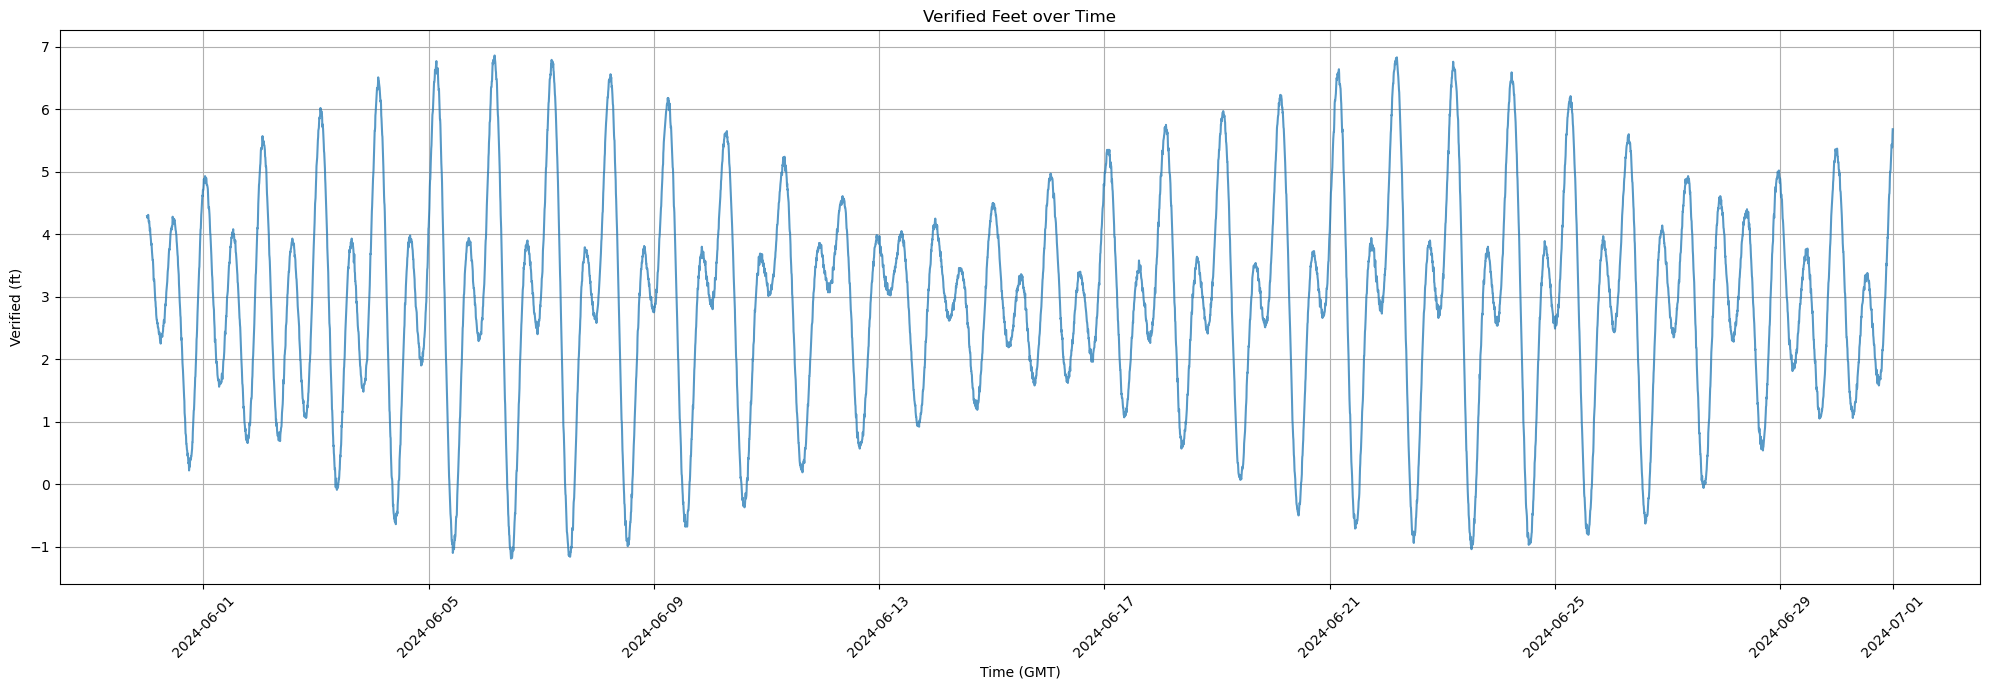

In [63]:
plt.figure(figsize=(20, 7))
plt.plot(df['DateTime'], df['Verified (ft)'], '-', alpha=0.75)
plt.title('Verified Feet over Time')
plt.xlabel('Time (GMT)')
plt.ylabel('Verified (ft)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

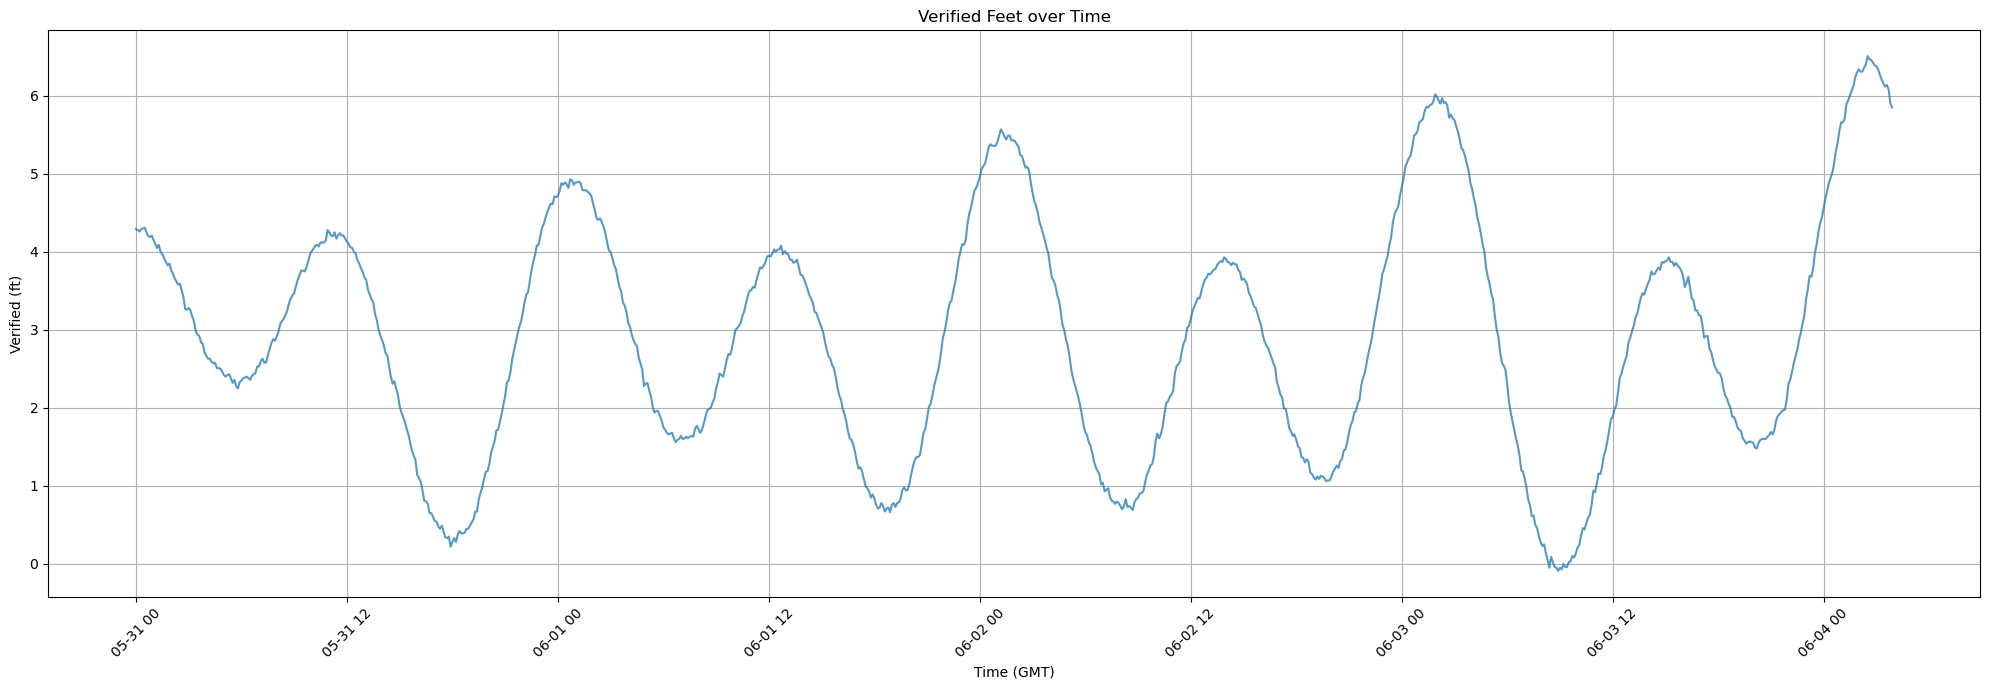

In [78]:
k = 1000

plt.figure(figsize=(20, 7))
plt.plot(df['DateTime'][:k], df['Verified (ft)'][:k], '-', alpha=0.75)
plt.title('Verified Feet over Time')
plt.xlabel('Time (GMT)')
plt.ylabel('Verified (ft)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
import requests

url = "https://moon-phase.p.rapidapi.com/advanced"

querystring = {"lat":"34.00830","lon":"-118.50000"}

headers = {
	"x-rapidapi-key": "3fcc11c7c6msh43942b5ab469fc2p17d090jsnb0a0d5328a48",
	"x-rapidapi-host": "moon-phase.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [89]:
print(data.keys())
data

dict_keys(['timestamp', 'datestamp', 'plan', 'sun', 'moon', 'moon_phases', 'location'])


{'timestamp': 1721234711,
 'datestamp': 'Wed, 17 Jul 2024 18:45:11 +0200',
 'plan': 'BASIC',
 'sun': {'sunrise': 1721185320,
  'sunrise_timestamp': '05:02',
  'sunset': 1721243340,
  'sunset_timestamp': '21:09',
  'solar_noon': '13:06',
  'day_length': '16:07',
  'sun_altitude': -12.306527430343165,
  'sun_distance': 152059278.33947453,
  'sun_azimuth': 330.185190271653,
  'next_solar_eclipse': {'timestamp': 1727887573,
   'datestamp': 'Wed, 02 Oct 2024 18:46:13 +0200',
   'type': 'Annular Solar Eclipse',
   'visibility_regions': 'Pacific, s South America ; [Annular: s Chile, s Argentina]'}},
 'moon': {'phase': 0.3468031478872122,
  'phase_name': 'Waxing Gibbous',
  'stage': 'waxing',
  'illumination': '79%',
  'age_days': 11,
  'lunar_cycle': '34.68%',
  'emoji': '🌔',
  'zodiac': {'sun_sign': 'Cancer', 'moon_sign': 'Scorpio'},
  'moonrise': '16:53',
  'moonrise_timestamp': 1721227980,
  'moonset': '00:27',
  'moonset_timestamp': 1721168820,
  'moon_altitude': 10.545090262520997,
  'mo

In [92]:
import http.client

conn = http.client.HTTPSConnection("moon-phase.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "3fcc11c7c6msh43942b5ab469fc2p17d090jsnb0a0d5328a48",
    'x-rapidapi-host': "moon-phase.p.rapidapi.com"
}

conn.request("GET", "/calendar?format=html", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

<table><tr><th>Month</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>7</th><th>8</th><th>9</th><th>10</th><th>11</th><th>12</th><th>13</th><th>14</th><th>15</th><th>16</th><th>17</th><th>18</th><th>19</th><th>20</th><th>21</th><th>22</th><th>23</th><th>24</th><th>25</th><th>26</th><th>27</th><th>28</th><th>29</th><th>30</th><th>31</th></tr><tr><td>January</td><td>🌕</td><td>🌖</td><td>🌖</td><td>🌖</td><td>🌗</td><td>🌗</td><td>🌗</td><td>🌗</td><td>🌘</td><td>🌘</td><td>🌘</td><td>🌘</td><td>🌑</td><td>🌑</td><td>🌑</td><td>🌒</td><td>🌒</td><td>🌒</td><td>🌒</td><td>🌓</td><td>🌓</td><td>🌓</td><td>🌓</td><td>🌔</td><td>🌔</td><td>🌔</td><td>🌕</td><td>🌕</td><td>🌕</td><td>🌕</td><td>🌖</td></tr><tr><td>February</td><td>🌖</td><td>🌖</td><td>🌗</td><td>🌗</td><td>🌗</td><td>🌗</td><td>🌘</td><td>🌘</td><td>🌘</td><td>🌘</td><td>🌑</td><td>🌑</td><td>🌑</td><td>🌒</td><td>🌒</td><td>🌒</td><td>🌒</td><td>🌓</td><td>🌓</td><td>🌓</td><td>🌓</td><td>🌔</td><td>🌔</td><td>🌔</td><td>🌕</td><td>🌕</td><td>🌕</td><td>🌕</td><t

In [91]:
response

<Response [200]>